# Training Data set 'Placement_Data_Full_Class' for predicting Placement and salary


### Import Dependencies

In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



#Loading the  csv file 
placement=pd.read_csv("Placement_Data_Full_Class.csv")

### Data Preprocessing I


In [64]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [65]:
placement.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [66]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [67]:
#Check the number of unique value from all of the object datatype
placement.select_dtypes(include='object').nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [68]:
# Drop sl_no column because its only identifier column
placement.drop(columns='sl_no', inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Data Analysis
* To plot graphs between different categories in data set

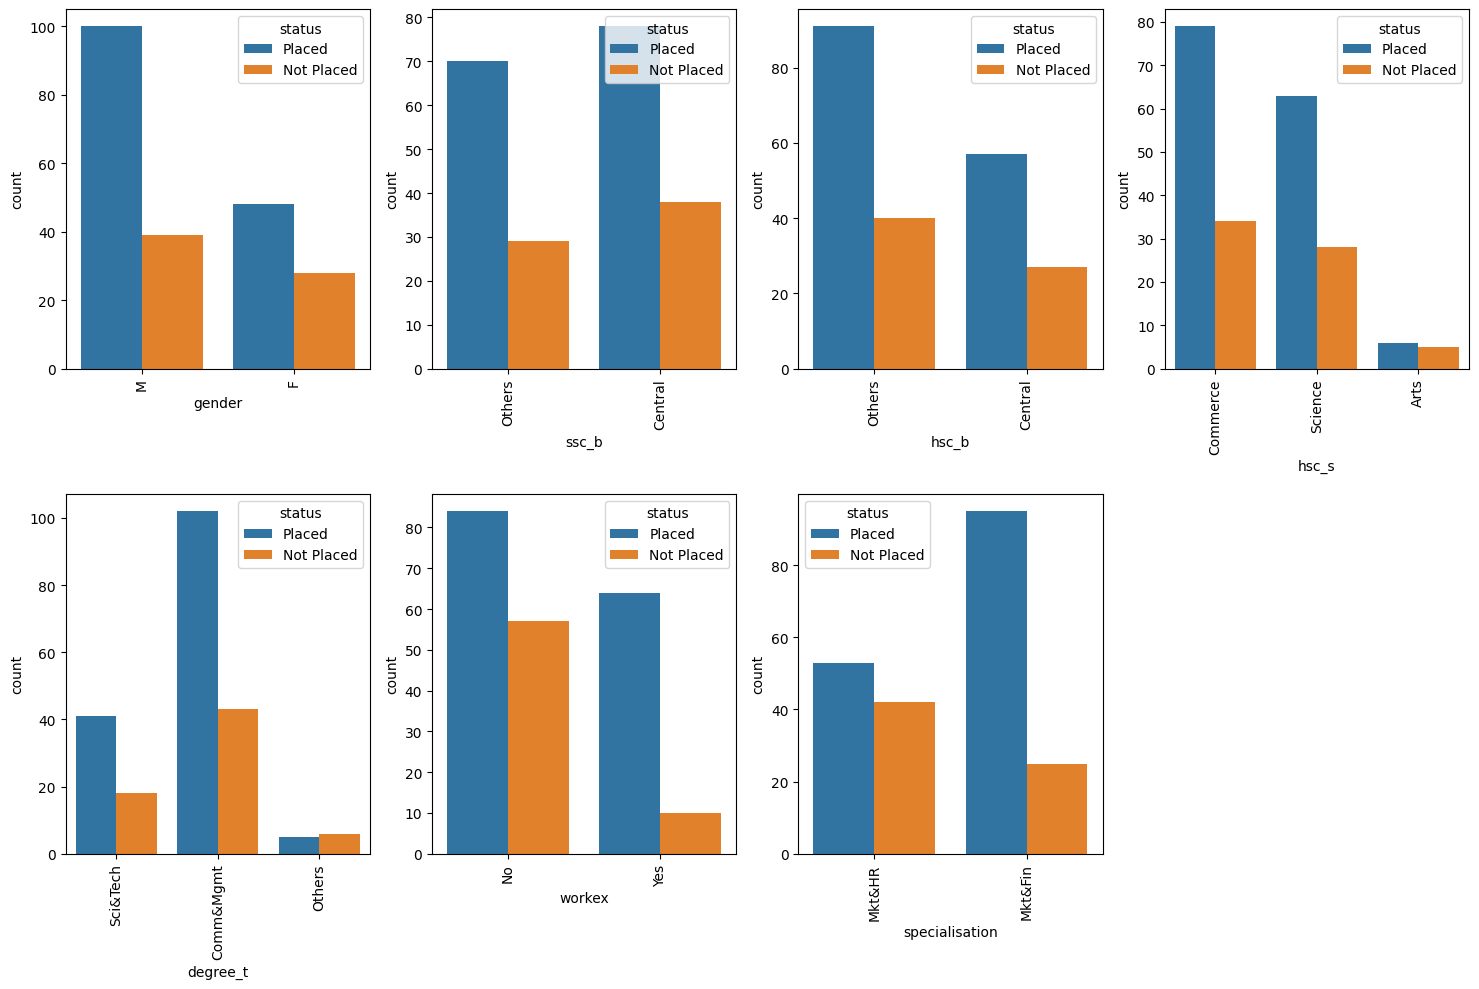

In [69]:
# list of categorical variables to plot
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='status', data=placement, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

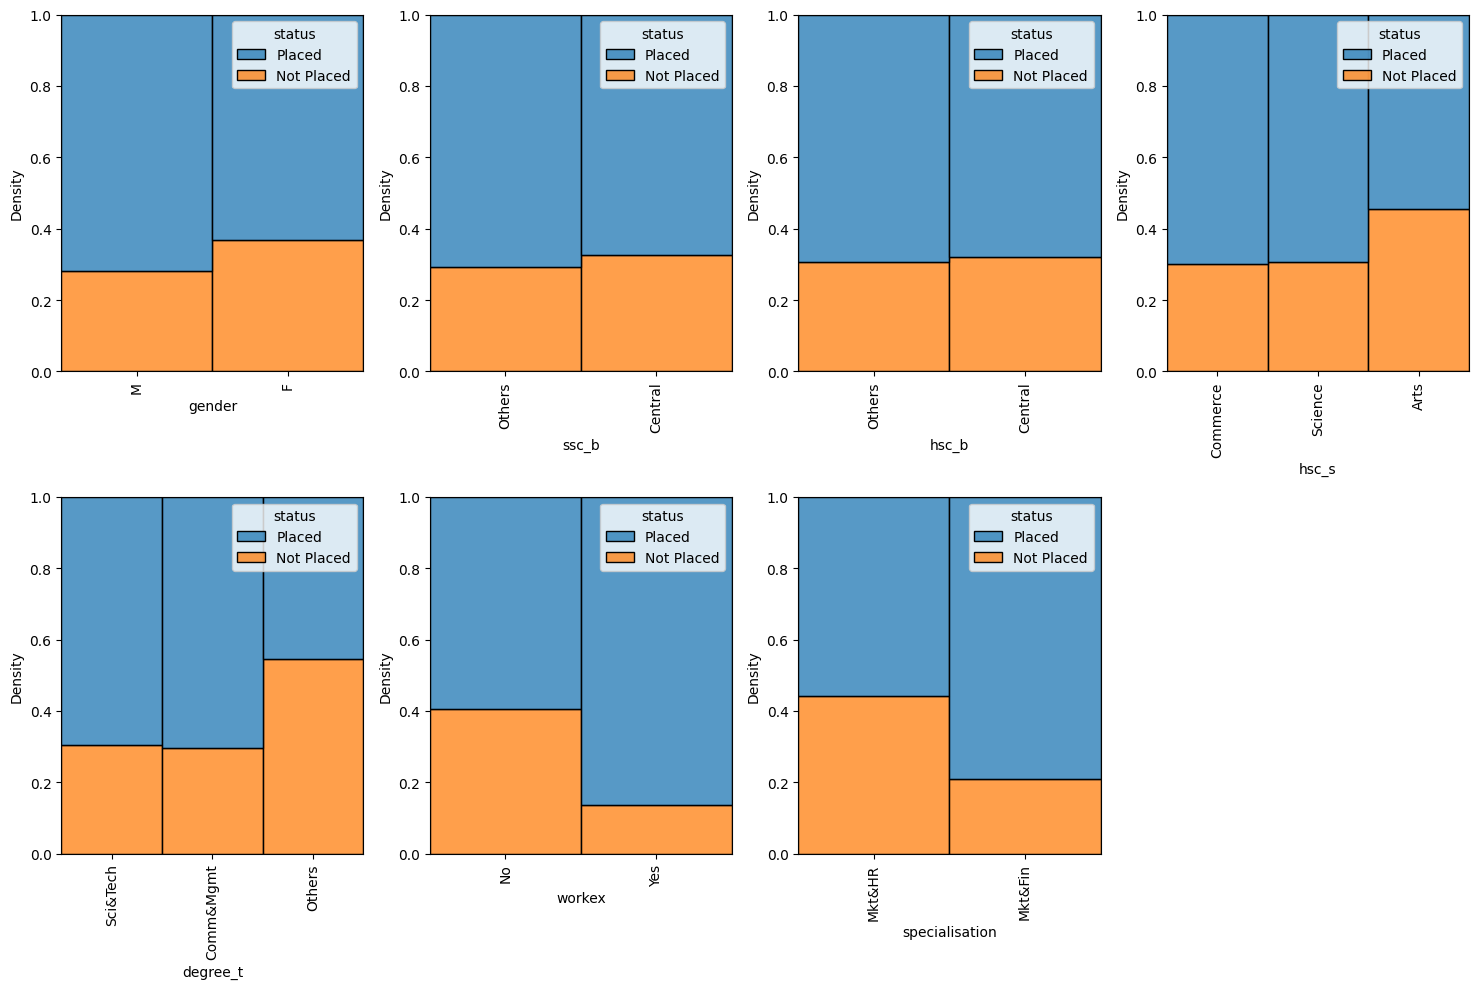

In [70]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='status', data=placement, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(placement[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

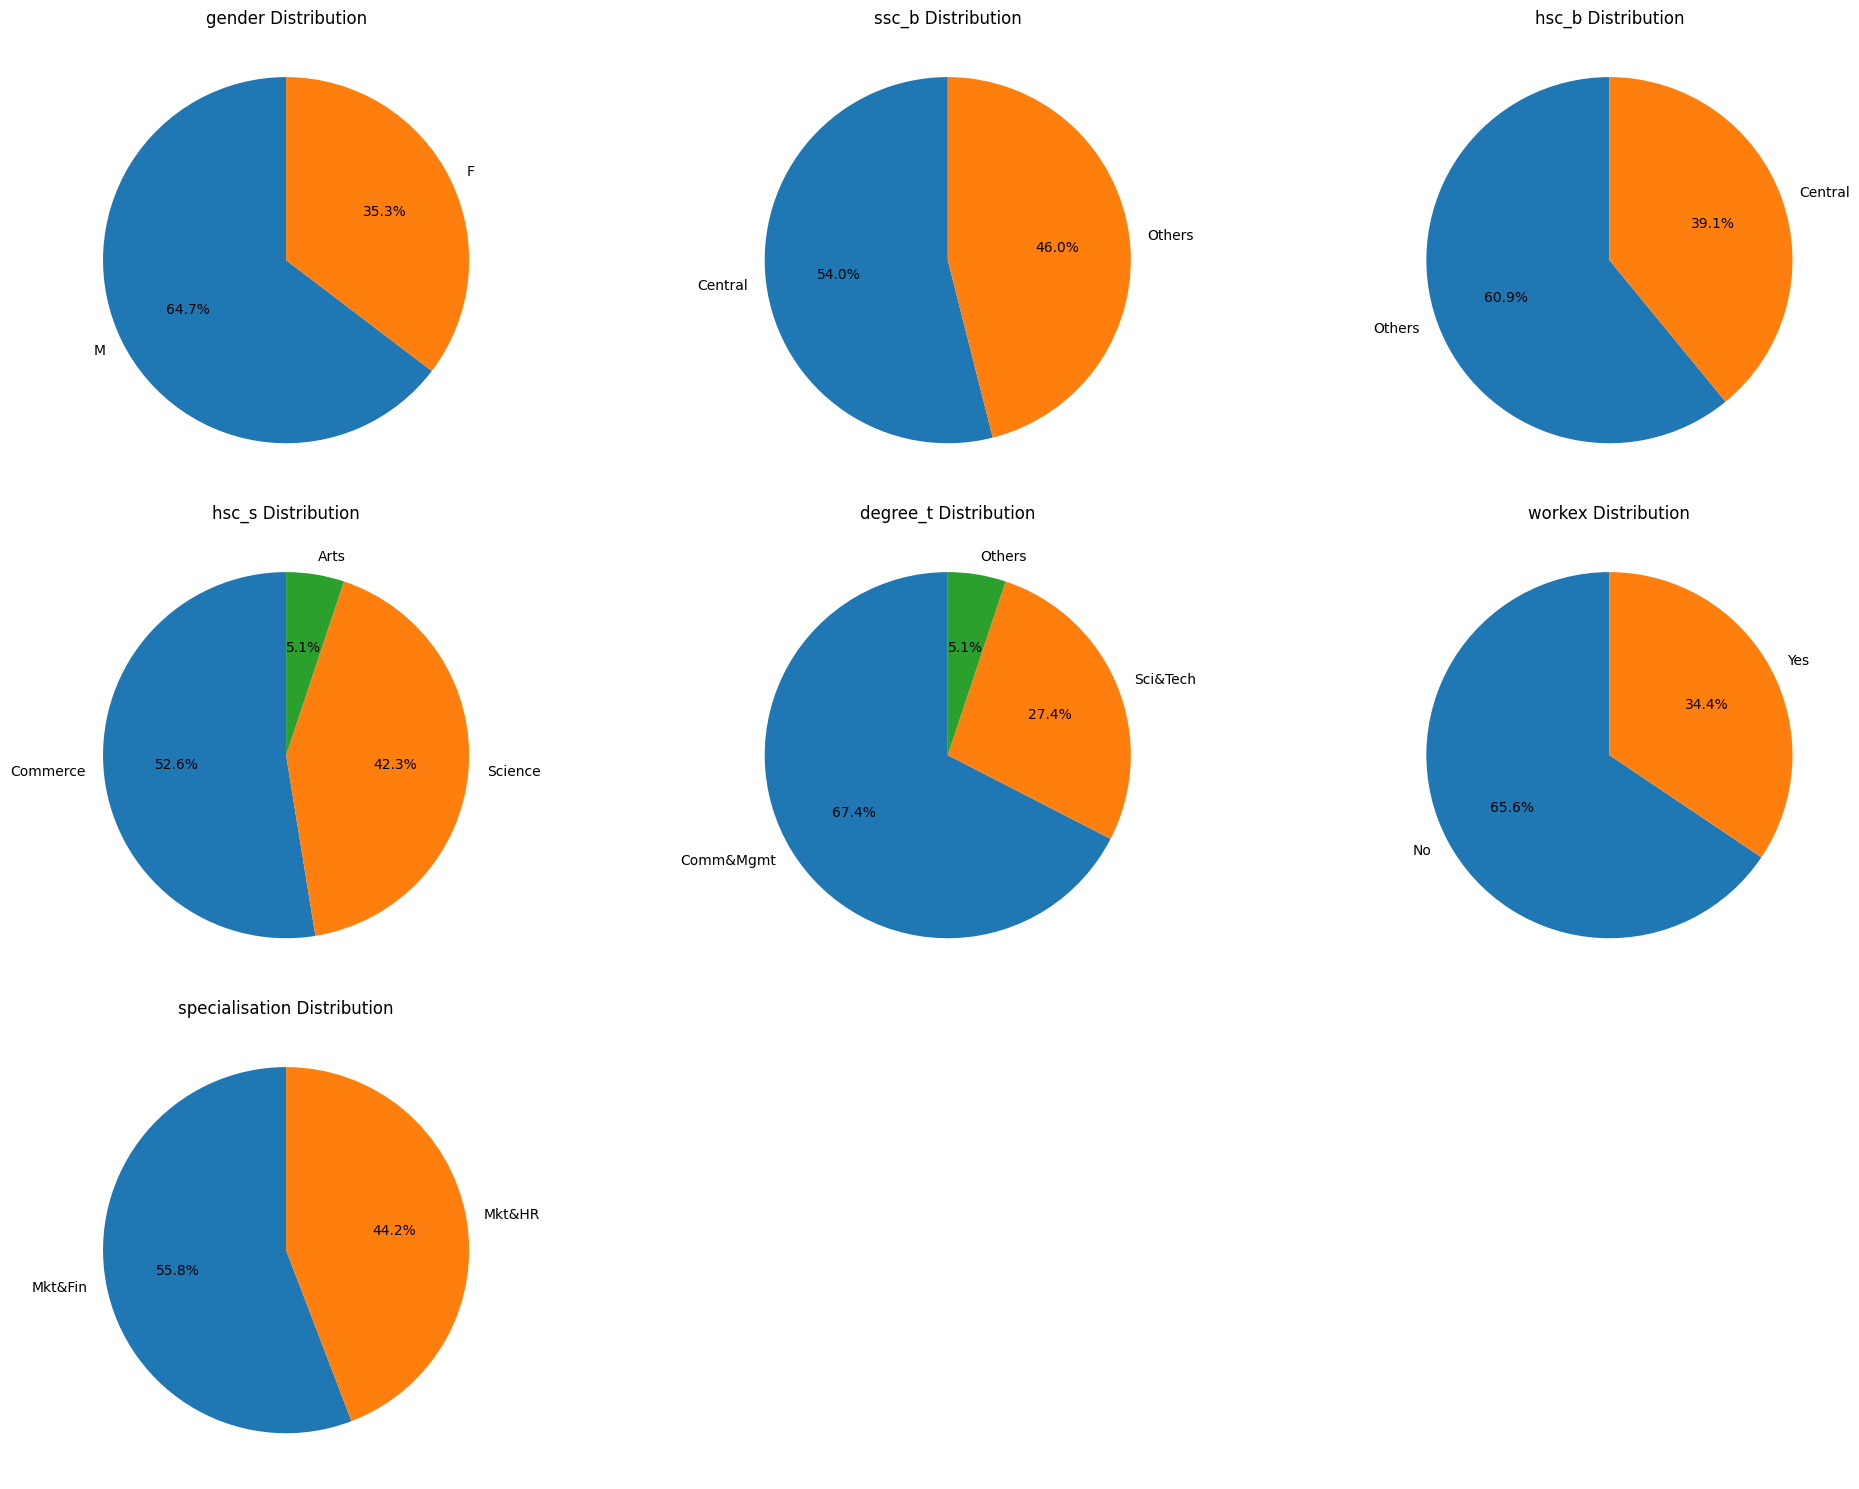

In [71]:
# create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = placement[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# remove the eighth and ninth subplot
fig.delaxes(axs[2, 2])  # 2 represents the row index, and 2 represents the column index
fig.delaxes(axs[2, 1])  # 2 represents the row index, and 1 represents the column index

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

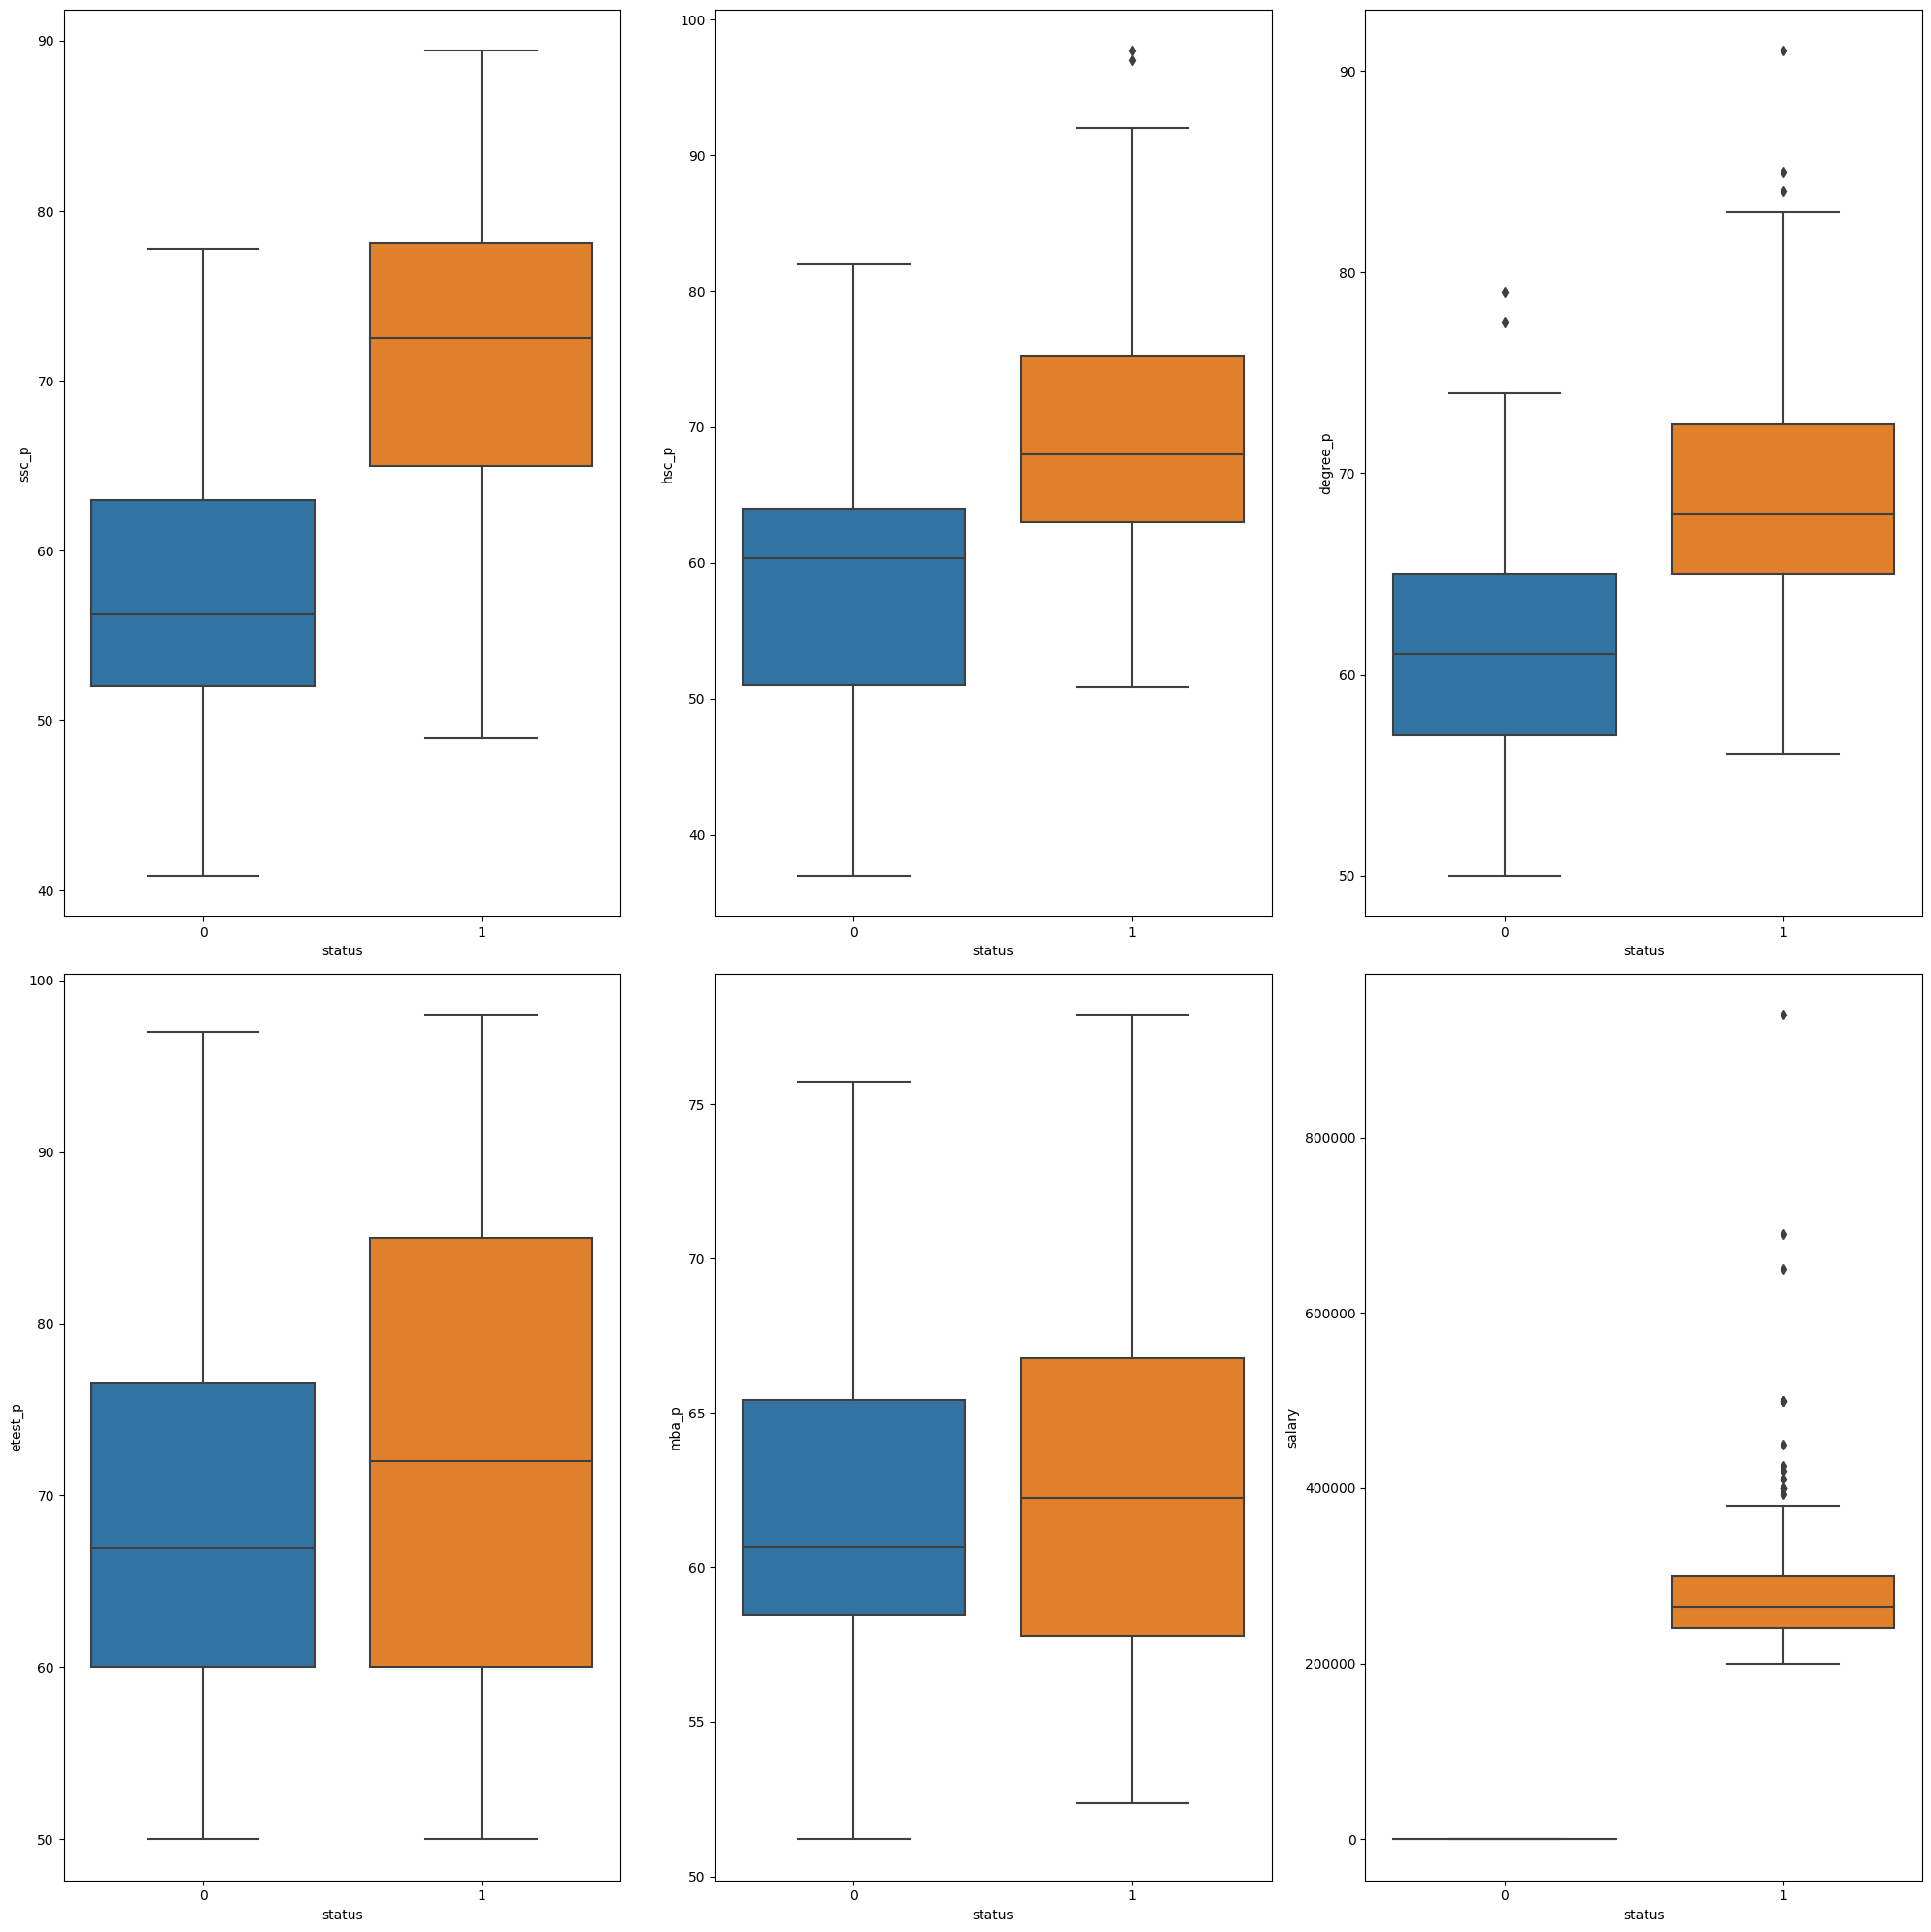

In [92]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='status', data=placement, ax=axs[i])

fig.tight_layout()

plt.show()

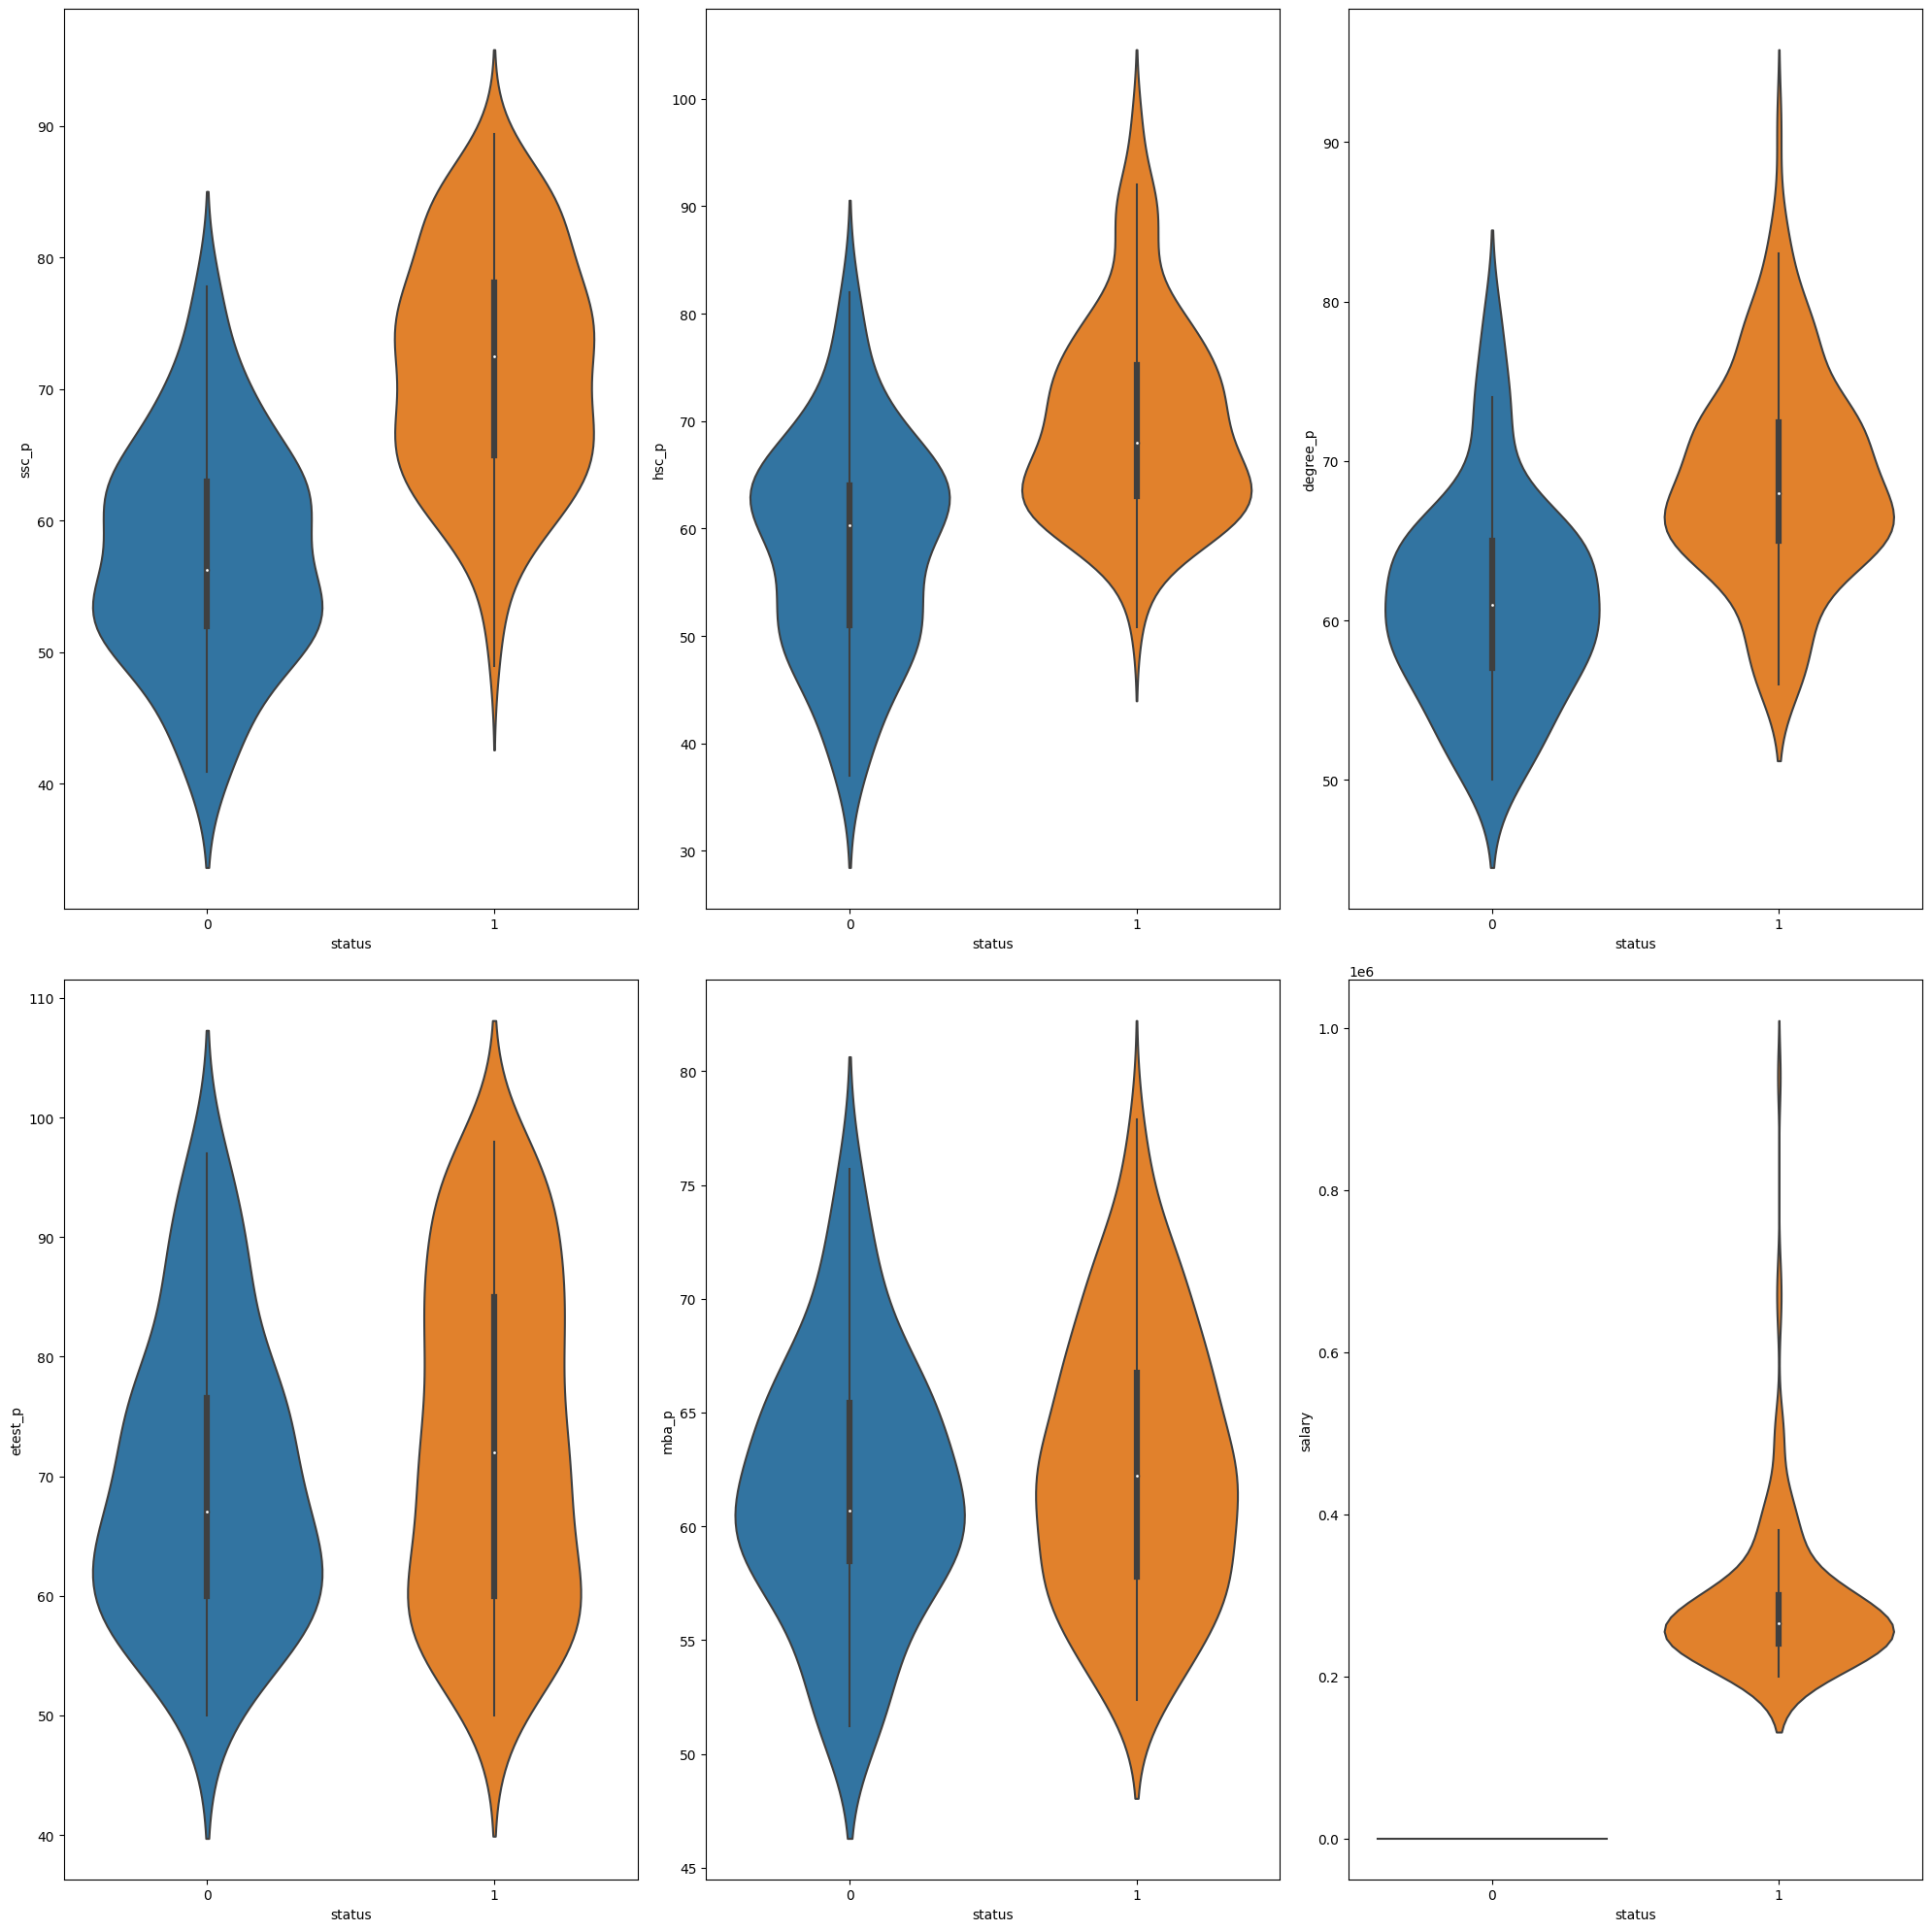

In [94]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=placement, x='status', ax=axs[i])

fig.tight_layout()

plt.show()

### Data Processing II

In [72]:
# To set salary as ZERO for unhired people

placement['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement['salary'].isnull().sum(), sep = '\n')

placement.head()

Salary column with null values:
0


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#### Label Encoding / Hot Key Encoding

In [73]:
for col in placement.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {placement[col].unique()}")

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [74]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in placement.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(placement[col].unique())

    # Transform the column using the encoder
    placement[col] = label_encoder.transform(placement[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {placement[col].unique()}")

gender: [1 0]
ssc_b: [1 0]
hsc_b: [1 0]
hsc_s: [1 2 0]
degree_t: [2 0 1]
workex: [0 1]
specialisation: [1 0]
status: [1 0]


#### Correlation Heatmap

<Axes: >

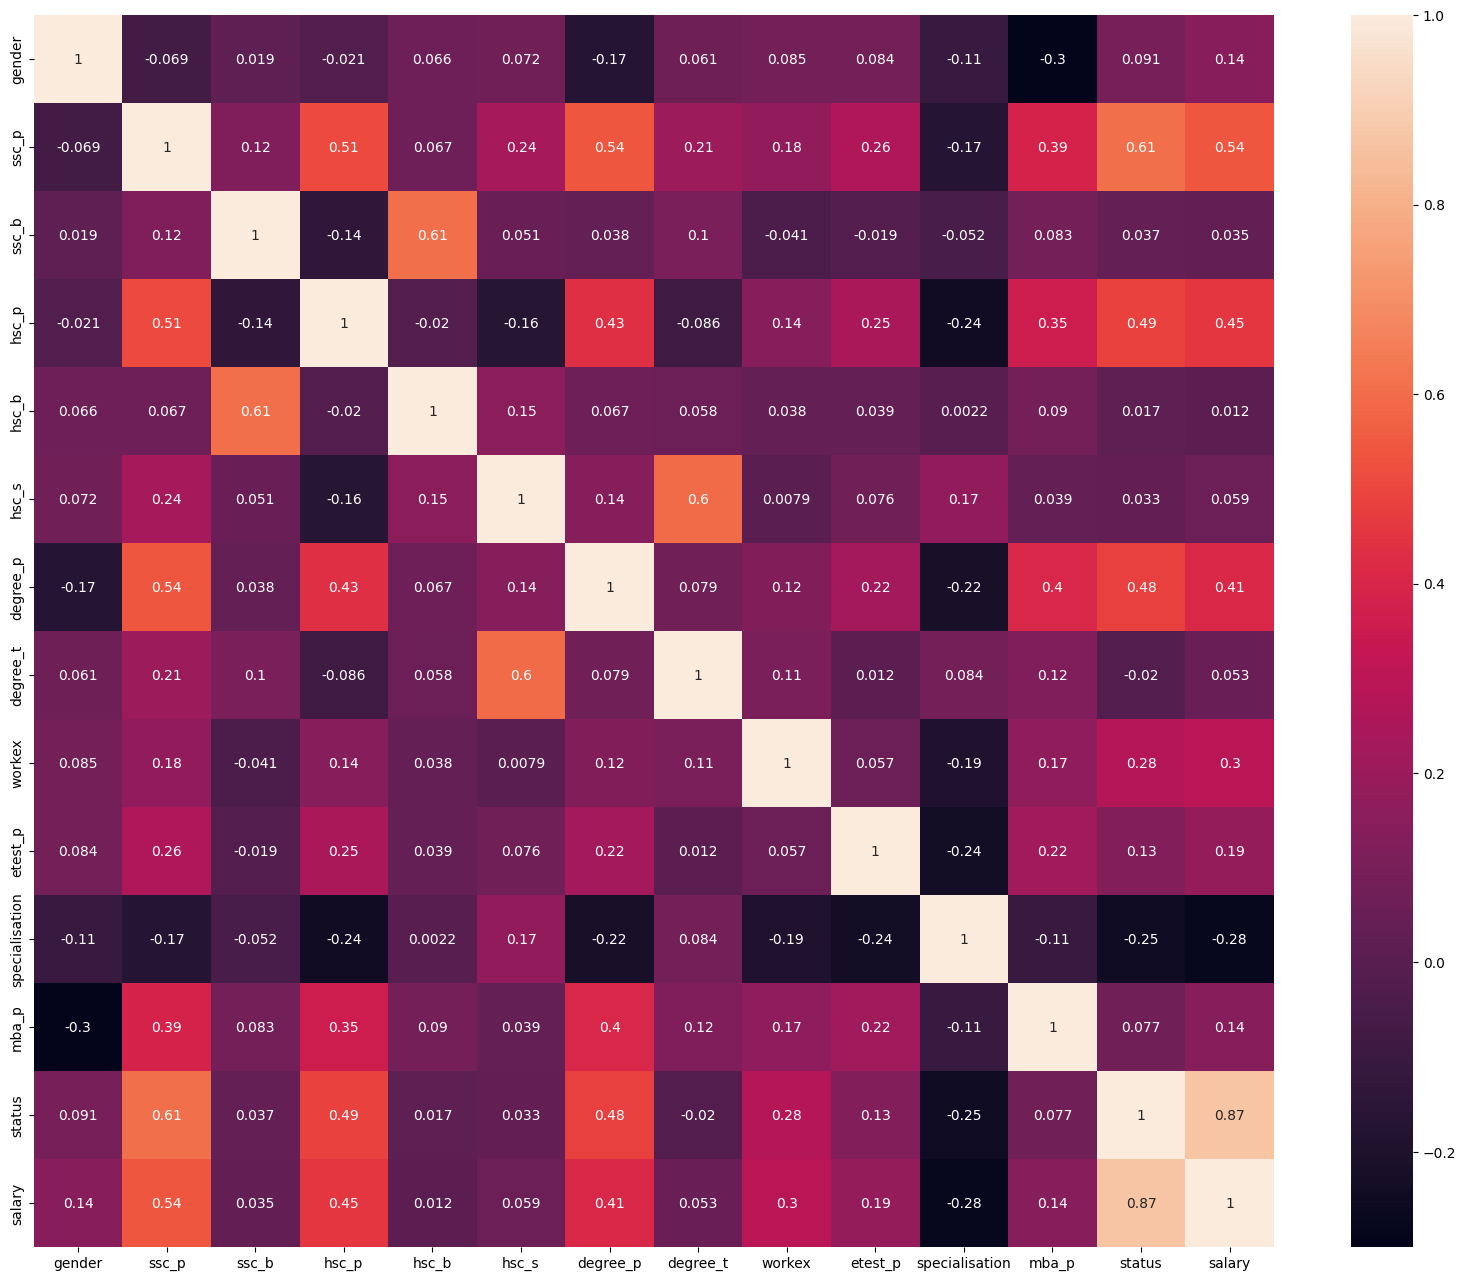

In [75]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(placement.corr(), fmt='.2g', annot=True)

## Train Models

### Split data for training and testing

In [76]:
x=placement.drop(['status','salary'],axis=1)
y=placement.status
z=placement.salary

X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(x, y, z, test_size=0.2, random_state=0)

In [77]:
# Import model dependencies
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Assuming you've already preprocessed the data and split it into X_train, X_test, Y_train, Y_test, Z_train, and Z_test.


* SVM (Support Vector Machine) for Placement Prediction (Classification)
* Decision Tree for Placement Prediction (Classification)
* Random Forest for Placement Prediction (Classification)
* Logistic Regression for Placement Prediction (Classification)
* K-Nearest Neighbors (KNN) for Placement Prediction 
* Linear Regression for Salary Prediction
* Gaussian Process Regression for Salary Prediction
* Gradient Boosting Machines for Salary Prediction
* Recurrent Neural Network (RNN) for Salary Prediction


In [78]:
# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)
Y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")


SVM Accuracy: 0.7209302325581395


In [79]:
# Decision Tree
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, Y_train)
Y_pred_dt = decision_tree_classifier.predict(X_test)
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Accuracy: 0.6976744186046512


In [80]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, Y_train)
Y_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

## Model for Kaggle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(Y_test, y_pred)*100 ,2), "%")

Random Forest Accuracy: 0.6976744186046512
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}
Accuracy Score : 65.12 %


In [81]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
Y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")


Logistic Regression Accuracy: 0.813953488372093


In [85]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")


KNN Accuracy: 0.6744186046511628


In [82]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Z_train)
Z_pred_lr = linear_regressor.predict(X_test)
mae_lr = mean_absolute_error(Z_test, Z_pred_lr)
mse_lr = mean_squared_error(Z_test, Z_pred_lr)
r2_lr = r2_score(Z_test, Z_pred_lr)
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")


Linear Regression MAE: 94036.33332214238
Linear Regression MSE: 12064488400.765806
Linear Regression R2: 0.3360554247438935


In [83]:
# Gaussian Process Regression
gaussian_process_regressor = GaussianProcessRegressor()
gaussian_process_regressor.fit(X_train, Z_train)
Z_pred_gp = gaussian_process_regressor.predict(X_test)
mae_gp = mean_absolute_error(Z_test, Z_pred_gp)
mse_gp = mean_squared_error(Z_test, Z_pred_gp)
r2_gp = r2_score(Z_test, Z_pred_gp)
print(f"Gaussian Process MAE: {mae_gp}")
print(f"Gaussian Process MSE: {mse_gp}")
print(f"Gaussian Process R2: {r2_gp}")


Gaussian Process MAE: 168161.93956076205
Gaussian Process MSE: 46449073846.228516
Gaussian Process R2: -1.5562302835747381


In [84]:
# Gradient Boosting Machines
gbm_regressor = GradientBoostingRegressor()
gbm_regressor.fit(X_train, Z_train)
Z_pred_gbm = gbm_regressor.predict(X_test)
mae_gbm = mean_absolute_error(Z_test, Z_pred_gbm)
mse_gbm = mean_squared_error(Z_test, Z_pred_gbm)
r2_gbm = r2_score(Z_test, Z_pred_gbm)
print(f"Gradient Boosting MAE: {mae_gbm}")
print(f"Gradient Boosting MSE: {mse_gbm}")
print(f"Gradient Boosting R2: {r2_gbm}")


Gradient Boosting MAE: 106134.96426282304
Gradient Boosting MSE: 21170619853.423077
Gradient Boosting R2: -0.16508199432619564


In [90]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Create a sequential RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1), activation='relu'))
rnn_model.add(Dense(1))  # One output neuron for salary prediction

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data to make it compatible with RNN (assuming X_train and X_test are 2D arrays)
X_train_rnn = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test_rnn = X_test.values.reshape(-1, X_test.shape[1], 1)

# Train the RNN model
rnn_model.fit(X_train_rnn, Z_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
Z_pred_rnn = rnn_model.predict(X_test_rnn)

# Evaluate the RNN model (use regression metrics)
mae_rnn = mean_absolute_error(Z_test, Z_pred_rnn)
mse_rnn = mean_squared_error(Z_test, Z_pred_rnn)
r2_rnn = r2_score(Z_test, Z_pred_rnn)
print(f"RNN MAE: {mae_rnn}")
print(f"RNN MSE: {mse_rnn}")
print(f"RNN R2: {r2_rnn}")


ImportError: DLL load failed while importing _pywrap_tfe: The specified procedure could not be found.